<h1> Project Portfolio: Customer Subscription Prediction </h1>

<h3>Problem Definition:</h3><br>
You are a Data Scientist with the marketing team at a banking institution. The Marketing Manager has been running phone based marketing campaigns to market the new product which is a bank term deposit. The manager has historical data from marketing campaigns in the past for a similar product. Historical data is available in full.csv dataset. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

As the DS in the team, your manager wants you to build an ML based model to predict the likelihood of a customer subscribing to the term deposit. The data dictionary is below.

<h3>Data Source:</h3><br>
question_dataset.csv (provided during the class)

<h3>Data Dictionary:</h3>

#### Input variables:

#### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

<h3>Goal:</h3><br>
•	Build a ML based model to predict the likelihood of a customer subscribing to the term deposit.<br>
•	Predict whether a customer would subscribe or not subscribe given the marketing tactic using logistic regression and decision tree model.

<h3>Hypothesis:</h3><br>
•	Age: Over 40 years of age will more likely to subscribe than younger ones as they tend to be more financially established.<br>
•	Job: 'entrepreneur', 'management', 'retired', 'self-employed', 'technician' will be more likely to subscribe than 'blue-collar', 'housemaid', 'services, 'student', 'unemployed' as they have more income.<br>
•	Marital: Married people will be more likely to subscribe than single.<br>
•	Default: people with credit default will not likely/will be unable to subscribe.<br>
•	Housing: people with higher loans will not likely to subscribe.<br> 
•	Loan: people with higher personal loans will not likely to subscribe.<br>
•	Education: people with higher personal education will likely subscribe as they may have higher income.<br>
    •	contact: Cell phone group would subscribe more than the regular telephone group.<br>
    •	Month: Month wouldn't affect the amount of subscriptions.<br>
    •	previous: Contacting same customer more than once will help with increasing the subscriptions.<br>


#### Reference used
Guide to Data Exploration:<br>
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

# Summary of Key Findings

<h3> Key Findings of Past Data:</h3><br>
    •	<b>Age</b>: While Adults (25-44 years) were our main customers, seniors (65 years and over) tend to subscribe more after calling.<br>
    •	<b>Job</b>: While most of our customers have admin job, students groups were shown to subscribe after the phone call more than the admin group.<br>
    •	<b>Marital</b>: While most of our customers are married, single groups were shown to subscribe after the phone call more than married group.<br>
    •	<b>Default</b>: Customers who do not have their credit in default tend to subscribe more to phone calls.<br>
    •	<b>Housing</b>: people with higher loans will not likely to subscribe<br> 
    •	<b>Loan</b>: Loan status did not influence customer's decision for subscribing.<br>
    •	<b>Education</b>: Customers with University Degree is most likely to subscribe than any other education group.<br>
    •	<b>contact</b>: Cell phone group subscribed more than the regular telephone group.<br>
    •	<b>Month</b>: Although most calls have been made in May, we observe that March has been more efficient in getting the subscriptions.<br>
    •	<b>previous</b>: Contacting same customer more than once doesn't seem to be helping with increasing the subscriptions.<br>

<h3>Overall Recommendation for future marketing plan:</h3><br>

<b>age</b>: Age is shown to affect the subscription according to our model. While we still make a call to adults (25-44 years) who are our majority of customers, we should also increase targeting towards seniors (65 years and over) who showed more efficiency in getting the subscription after the call. 

<b>pdays</b>: While the model suggests pdays is affecting the subscriptions, our past data shows that more than 96% of the customers have not been contacted previously. We need to collect more data on the customers with previous contacts to make further conclusions on how many contact we can make to maximize the subscriptions. 

<b>campaign</b>: Campaign is shown to affect the subscription according to our model. However, our current data shows that for more than 80% of the customers, no more than 3 contacts have been made to prevent customer fatique. We need to collect more data on the frequency of the contacts to further determine how many contacts we can make to maximize the subscriptions. 

<b>days_of_week, month_Oct</b>: days_of_week is shown to affect the subscription according to our model. However, we will need to collect more information on both Year, Quarter, Month, and Day of Week to further understand if there is any seasonality or seasonal events that may be affecting the subscription.

For variables i.e. nr.employed, euribor3m, cons.conf.idx, cons.price.idx, while we cannot control these economic variables, we can use these values to predict how many subscriptions we would expect to have for the next quarter.

# Appendix

<h1> Part 1. Data Wrangling and Exploratory Data Analysis</h1>
<h2> 1.1. Import Libraries </h2><br>
<a id='1.1. Import Libraries'></a>
First, we'll load pandas, numpy, matplotlib, and seaborn library and then load csv files.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('question_dataset.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We will make a copy of original dataset in case we need it later.

In [4]:
df_original = df.copy()

We will then get information on both the train dataset and the test dataset.

In [5]:
df.info() # All columns do not have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Let's look at datatypes of each variables for the train and test dataset.

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.describe().T[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [8]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


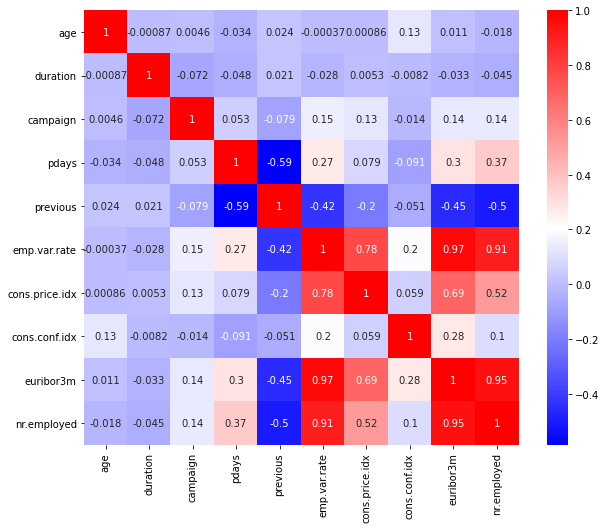

In [9]:
df_corr = df.corr()
ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(df_corr, cmap="bwr",  square=True, annot=True);

Positive correlation was observed between:
- nr. employed and emp. var. rate
- nr. employed and euribor3m 
- euribor3m and emp. var. rate 
- euribor3m and cons. price idx
- emp. var. rate and cons. price idx

No strong negative correlation was observed. 

<h2> 1.2. Exploratory Data Analysis </h2>

Let's look at the number of counts of each column. For any columns where we have unknown values, we'll normalize it and look at the proportions of the unknowns in the dataset. If we have too many missing values or unknowns, we'll either discard the column or fill in the missing values with the mean or median or mode depending on the data.

We will create a copy of dataframe df_edited which will be the selected and massaged data. 

In [10]:
df_edited = df.copy()

### 1.2.1. bank client data:

#### Age

In [11]:
df['age'].unique() # doesn't seem to be any outliers

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

C:\Users\Sun\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


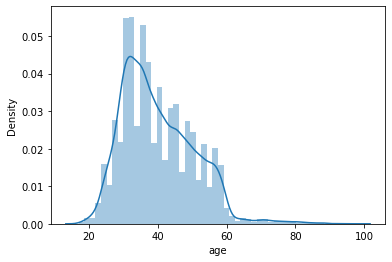

In [12]:
sns.distplot(df['age']);

Most customers are in their 30s.

#### Job

In [13]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [14]:
df['job'].value_counts(normalize=True) # 0.80% of the data is unknown

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

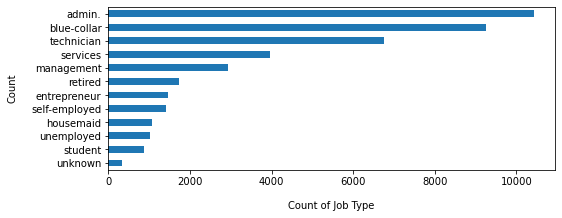

In [15]:
df['job'].value_counts(ascending=True).plot(kind='barh', figsize=(8, 3))
plt.xlabel("Count of Job Type", labelpad=14)
plt.ylabel("Count", labelpad=14);

Top three popular jobs of the customers are 'admin.', 'blue-collar', and 'technician'

We'll remove the unknowns in df_edited since they are only 0.8% of the total data.

In [16]:
df_edited = df.loc[df['job'] != 'unknown']
df_edited.shape

(40858, 21)

#### Marital Status 

In [17]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [18]:
df['marital'].value_counts(normalize=True) # 0.19% of data is unknown

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

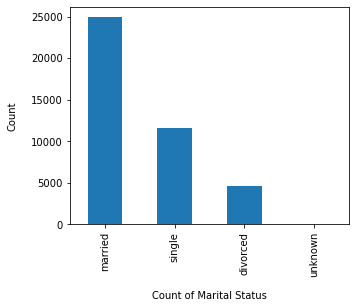

In [19]:
df['marital'].value_counts().plot(kind='bar', figsize=(5, 4))
plt.xlabel("Count of Marital Status", labelpad=14)
plt.ylabel("Count", labelpad=14);

More than half of the customers are married

We'll remove the unknowns in df_edited since they are only 0.19% of data. 

In [20]:
df_edited = df_edited.loc[df['marital'] != 'unknown']
df_edited.shape

(40787, 21)

#### Education

In [21]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [22]:
df['education'].value_counts(normalize=True) # 4.20% of data is unknown

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

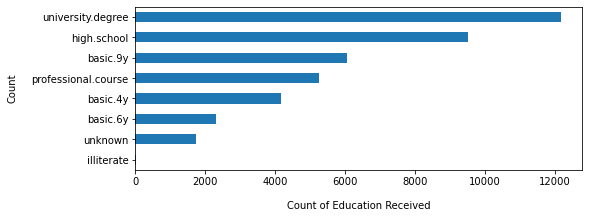

In [23]:
df['education'].value_counts(ascending=True).plot(kind='barh', figsize=(8, 3))
plt.xlabel("Count of Education Received", labelpad=14)
plt.ylabel("Count", labelpad=14);

About 30% of the customers have at least a university degree and more than 50% of customers have graduated from high school. 

We'll remove the unknowns in df_edited since they are only 4.2% of data. 

In [24]:
df_edited = df_edited.loc[df['education'] != 'unknown']
df_edited.shape

(39191, 21)

#### default: has credit in default? (categorical: 'no','yes','unknown')

In [25]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [26]:
df['default'].value_counts(normalize=True) # 20.87% of data is unknown

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

Majority of the customers do not have credit in default. Only 0.0073% of customers have 'yes'. We won't take this column for modelling.

In [27]:
df_edited = df_edited.drop(['default'], axis=1)
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### housing: has housing loan? (categorical: 'no','yes','unknown')

In [28]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [29]:
df['housing'].value_counts(normalize=True) # 2.40% of data is unknown

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

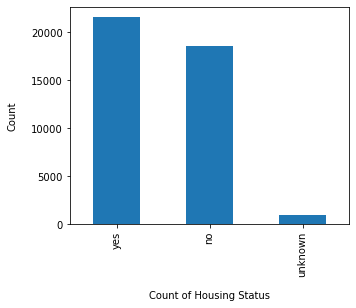

In [30]:
df['housing'].value_counts().plot(kind='bar', figsize=(5, 4))
plt.xlabel("Count of Housing Status", labelpad=14)
plt.ylabel("Count", labelpad=14);

More than 50% of customers have a housing. 

We'll remove the unknowns in df_edited since they are only 2.40% of data. 

In [31]:
df_edited = df_edited.loc[df['housing'] != 'unknown']
df_edited.shape

(38245, 20)

#### loan: has personal loan? (categorical: 'no','yes','unknown')

In [32]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [33]:
df['loan'].value_counts(normalize = True) # 2.4% of data is unknown.

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

More than 80% of customers do not have a personal loan.

We'll remove the unknowns in df_edited since they are only 2.4% of data. 

In [34]:
df_edited = df_edited.loc[df['loan'] != 'unknown']
df_edited.shape

(38245, 20)

### 1.2.2. related with the last contact of the current campaign:

#### Contact

In [35]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [36]:
df['contact'].value_counts(normalize=True)

cellular     0.634748
telephone    0.365252
Name: contact, dtype: float64

Cold-calling was done mostly using cell phone

#### Month: last contact month of the year

In [37]:
df['month'] = df['month'].str.capitalize()
df['month'].unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Oct', 'Nov', 'Dec', 'Mar', 'Apr',
       'Sep'], dtype=object)

In [38]:
df['month'].value_counts(normalize=True)

May    0.334296
Jul    0.174177
Aug    0.149995
Jun    0.129115
Nov    0.099568
Apr    0.063902
Oct    0.017432
Sep    0.013839
Mar    0.013256
Dec    0.004419
Name: month, dtype: float64

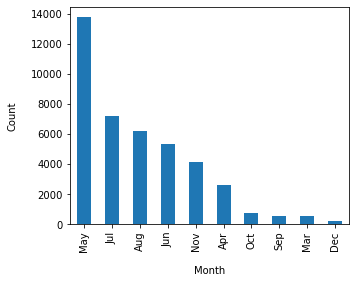

In [39]:
df['month'].value_counts().plot(kind='bar', figsize=(5, 4))
plt.xlabel("Month", labelpad=14)
plt.ylabel("Count", labelpad=14);

Most customers have been last contacted in May. The campaign was most active in May.

#### day_of_week: last contact day of the week

In [40]:
df['day_of_week'] = df['day_of_week'].str.capitalize()
df['day_of_week'].unique()

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [41]:
df['day_of_week'].value_counts(normalize=True)

Thu    0.209357
Mon    0.206711
Wed    0.197485
Tue    0.196416
Fri    0.190031
Name: day_of_week, dtype: float64

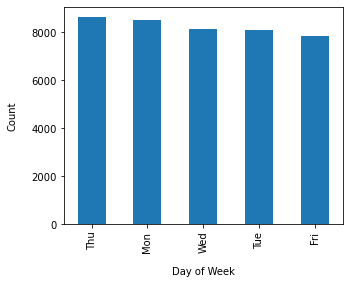

In [42]:
df['day_of_week'].value_counts().plot(kind='bar', figsize=(5, 4))
plt.xlabel("Day of Week", labelpad=14)
plt.ylabel("Count", labelpad=14);

There wasn't a particular day of the week where customers have been contacted the most. We won't take this column for modelling.

In [43]:
df_edited = df_edited.drop(['day_of_week'], axis=1)
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

#### duration: last contact duration, in seconds (numeric)

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [44]:
df['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

C:\Users\Sun\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


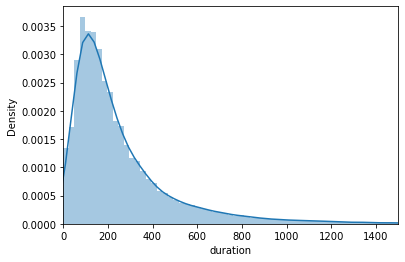

In [45]:
sns.distplot(df['duration'], bins = 200)
plt.xlim(0, 1500);

In [46]:
df['duration'].value_counts(normalize=True)

85      0.004127
90      0.004127
136     0.004079
73      0.004055
124     0.003982
          ...   
1108    0.000024
980     0.000024
4918    0.000024
2453    0.000024
2015    0.000024
Name: duration, Length: 1544, dtype: float64

In [47]:
df.loc[df['duration']==0]['duration'].value_counts() # very few number of calls have been rejected right away.

0    4
Name: duration, dtype: int64

We don't know the duration unless we have the phone call. We won't look at this variable.

In [48]:
df_edited = df_edited.drop(['duration'], axis=1)
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### 1.2.3. Other Attributes: 

#### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [49]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [50]:
df['campaign'].value_counts(normalize=True).head(5)

1    0.428329
2    0.256628
3    0.129674
4    0.064363
5    0.038822
Name: campaign, dtype: float64

For more than 80% of the customers, no more than 3 contacts have been made to prevent customer fatique.

#### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [51]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

We'll change 999 to 0 to note that the client was not previously contacted.

In [52]:
df.loc[df['pdays'] == 999, 'pdays'] = 0
df['pdays'].unique()

array([ 0,  6,  4,  3,  5,  1, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15, 16,
       21, 17, 18, 22, 25, 26, 19, 27, 20], dtype=int64)

In [53]:
df['pdays'].value_counts(normalize = True) 

0     0.963582
3     0.010658
6     0.010003
4     0.002865
9     0.001554
2     0.001481
7     0.001457
12    0.001408
10    0.001263
5     0.001117
13    0.000874
11    0.000680
1     0.000631
15    0.000583
14    0.000486
8     0.000437
16    0.000267
17    0.000194
18    0.000170
19    0.000073
22    0.000073
21    0.000049
20    0.000024
25    0.000024
26    0.000024
27    0.000024
Name: pdays, dtype: float64

More than 96% of the customers have not been contacted previously. We won't look at this variable.

In [54]:
df_edited = df_edited.drop(['pdays'], axis=1)
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### previous: number of contacts performed before this campaign and for this client (numeric)

In [55]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [56]:
df['previous'].value_counts(normalize = True) 

0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

More than 86% of the customers have never been contacted including all previous campaigns. We'll do feature engineer on this column later on to decide whether to take the column or not.

#### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [57]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [58]:
df['poutcome'].value_counts(normalize=True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

More than 86% of the customers (same customers who've never ever been contacted in all campaigns) have no record of the previous marketing campaigns. We won't look at this variable and drop the column.

In [59]:
df_edited = df_edited.drop(['poutcome'], axis=1)
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### 1.2.4. social and economic context attributes

#### emp.var.rate: employment variation rate - quarterly indicator (numeric)

In [60]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

#### cons.price.idx: consumer price index - monthly indicator (numeric)

In [61]:
df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

#### cons.conf.idx: consumer confidence index - monthly indicator (numeric)

In [62]:
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

#### euribor3m: euribor 3 month rate - daily indicator (numeric)

In [63]:
df['euribor3m'].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

#### nr.employed: number of employees - quarterly indicator (numeric)

In [64]:
df['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

### 1.2.5. Output variable (desired target):

In [65]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [66]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

About 11.3% of customers subscribed.

<h2> 1.3. Data Manipulation </h2>

### 1.3.1. Convert Output variable 'y' to Numeric Values

We'll convert the output variable 'y' into numerical values. 

In [67]:
df['y_num']= ''
df.loc[df['y'] == 'yes', 'y_num'] = 1
df.loc[df['y'] == 'no', 'y_num'] = 0
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,Mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,May,Mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,May,Mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,May,Mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,May,Mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [68]:
# We will do the same for df_edited.
df_edited['y_num']= ''
df_edited.loc[df_edited['y'] == 'yes', 'y_num'] = 1
df_edited.loc[df_edited['y'] == 'no', 'y_num'] = 0
df_edited.head()

,age,job,marital,education,housing,loan,contact,month,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,56,housemaid,married,basic.4y,no,no,telephone,may,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,no,no,telephone,may,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,yes,no,telephone,may,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,telephone,may,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,yes,telephone,may,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0


In [69]:
df['y_num'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y_num, dtype: float64

In [70]:
df_edited['y_num'].value_counts(normalize=True)

0    0.888665
1    0.111335
Name: y_num, dtype: float64

### 1.3.2. Create Age Group

We'll also categorize age into more broader age groups and use the same grouping as the one used by Statistics Canada Report.<br>
(reference: https://www.statista.com/statistics/444858/canada-resident-population-by-gender-and-age-group/)

- Children (00-17 years)  
- Youth (18-24 years)  
- Adults (25-44 years)  
- Middle-Aged Adult (45-64 years)
- Seniors (65 years and over)

In [71]:
df['age_group'] = ''
df.loc[(df['age'] <= 17), 'age_group'] = 'Children (00-17 years)'
df.loc[(df['age'] >= 18) & (df['age'] < 25), 'age_group'] = 'Youth (18-24 years)'
df.loc[(df['age'] >= 25) & (df['age'] < 45), 'age_group'] = 'Adults (25-44 years)'
df.loc[(df['age'] >= 45) & (df['age'] < 65), 'age_group'] = 'Middle-Aged Adults (45-64 years)'
df.loc[(df['age'] >= 65), 'age_group'] = 'Seniors (65 years and over)'

In [72]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,Mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Middle-Aged Adults (45-64 years)
1,57,services,married,high.school,unknown,no,no,telephone,May,Mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Middle-Aged Adults (45-64 years)
2,37,services,married,high.school,no,yes,no,telephone,May,Mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Adults (25-44 years)
3,40,admin.,married,basic.6y,no,no,no,telephone,May,Mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Adults (25-44 years)
4,56,services,married,high.school,no,no,yes,telephone,May,Mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Middle-Aged Adults (45-64 years)


In [73]:
# We will do the same for df_edited.
df_edited['age_group'] = ''
df_edited.loc[(df_edited['age'] <= 17), 'age_group'] = 'Children (00-17 years)'
df_edited.loc[(df_edited['age'] >= 18) & (df_edited['age'] < 25), 'age_group'] = 'Youth (18-24 years)'
df_edited.loc[(df_edited['age'] >= 25) & (df_edited['age'] < 45), 'age_group'] = 'Adults (25-44 years)'
df_edited.loc[(df_edited['age'] >= 45) & (df_edited['age'] < 65), 'age_group'] = 'Middle-Aged Adults (45-64 years)'
df_edited.loc[(df_edited['age'] >= 65), 'age_group'] = 'Seniors (65 years and over)'

In [74]:
df['age_group'].unique()

array(['Middle-Aged Adults (45-64 years)', 'Adults (25-44 years)',
       'Youth (18-24 years)', 'Seniors (65 years and over)',
       'Children (00-17 years)'], dtype=object)

In [75]:
df_edited['age_group'].unique()

array(['Middle-Aged Adults (45-64 years)', 'Adults (25-44 years)',
       'Youth (18-24 years)', 'Seniors (65 years and over)',
       'Children (00-17 years)'], dtype=object)

### 1.3.3. Re-categorize Education and Create 'education_received' Group

We'll also re-categorize education by combining all the 4-9yr:
- Illiterate
- Basic 4-9y (assumed that this was 4-9y of elementary to high school education)
- High School
- Professional Course (assumed this includes all CEGEP or Apprenticeship Certificate)
- University Degree
- Unknown

In [76]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [77]:
df['education_received'] = ''
df.loc[(df['education'] == 'basic.4y'), 'education_received'] = 'Basic 4-9y'
df.loc[(df['education'] == 'basic.6y'), 'education_received'] = 'Basic 4-9y'
df.loc[(df['education'] == 'basic.9y'), 'education_received'] = 'Basic 4-9y'
df.loc[(df['education'] == 'university.degree'), 'education_received'] = 'University Degree'
df.loc[(df['education'] == 'high.school'), 'education_received'] = 'High School'
df.loc[(df['education'] == 'professional.course'), 'education_received'] = 'Professional Course'
df.loc[(df['education'] == 'illiterate'), 'education_received'] = 'Illiterate'
df.loc[(df['education'] == 'unknown'), 'education_received'] = 'Unknown'

In [78]:
# We will do the same for df_edited.
df_edited['education_received'] = ''
df_edited.loc[(df_edited['education'] == 'basic.4y'), 'education_received'] = 'Basic 4-9y'
df_edited.loc[(df_edited['education'] == 'basic.6y'), 'education_received'] = 'Basic 4-9y'
df_edited.loc[(df_edited['education'] == 'basic.9y'), 'education_received'] = 'Basic 4-9y'
df_edited.loc[(df_edited['education'] == 'university.degree'), 'education_received'] = 'University Degree'
df_edited.loc[(df_edited['education'] == 'high.school'), 'education_received'] = 'High School'
df_edited.loc[(df_edited['education'] == 'professional.course'), 'education_received'] = 'Professional Course'
df_edited.loc[(df_edited['education'] == 'illiterate'), 'education_received'] = 'Illiterate'
df_edited.loc[(df_edited['education'] == 'unknown'), 'education_received'] = 'Unknown'

In [79]:
df['education_received'].unique()

array(['Basic 4-9y', 'High School', 'Professional Course', 'Unknown',
       'University Degree', 'Illiterate'], dtype=object)

In [80]:
df_edited['education_received'].unique()

array(['Basic 4-9y', 'High School', 'Professional Course',
       'University Degree', 'Illiterate'], dtype=object)

In [81]:
df['education_received'].value_counts(normalize=True)

Basic 4-9y             0.303802
University Degree      0.295426
High School            0.231014
Professional Course    0.127294
Unknown                0.042027
Illiterate             0.000437
Name: education_received, dtype: float64

In [82]:
df_edited['education_received'].value_counts(normalize=True)

Basic 4-9y             0.315388
University Degree      0.309086
High School            0.241705
Professional Course    0.133351
Illiterate             0.000471
Name: education_received, dtype: float64

Once we re-group the education, it shows that most customers have basic 4-9y education.

### 1.3.4. Re-categorize 'previous' column 

We'll also re-categorize 'previous' by combining anything above 0:
- 0: never contacted previously
- 1: have been contacted in the past 

Then, we'll compare which ones give more subscriptions.

In [83]:
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num', 'age_group',
       'education_received'],
      dtype='object')

In [84]:
df_edited['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [85]:
df_edited['previous_num'] = ''
df_edited.loc[df_edited['previous'] == 0, 'previous_num'] = 0
df_edited.loc[df_edited['previous'] != 0, 'previous_num'] = 1
df_edited.head(3)

,age,job,marital,education,housing,loan,contact,month,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,age_group,education_received,previous_num
0,56,housemaid,married,basic.4y,no,no,telephone,may,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,Middle-Aged Adults (45-64 years),Basic 4-9y,0
1,57,services,married,high.school,no,no,telephone,may,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,Middle-Aged Adults (45-64 years),High School,0
2,37,services,married,high.school,yes,no,telephone,may,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,Adults (25-44 years),High School,0


In [86]:
df_edited['previous_num'].value_counts(normalize=True)

0    0.864584
1    0.135416
Name: previous_num, dtype: float64

More than 86% of the customers have not been previously contacted. There is not enough information about the customers who have been contacted previously and we won't look at this variable for modelling.

In [87]:
df_edited = df_edited.drop(['previous_num', 'previous'], axis=1)
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'y_num', 'age_group',
       'education_received'],
      dtype='object')

### 1.3.5. Create two separate dataset with customers who subscribed and customers who didn't subscribe.

We are going to name dataset with customers who have subscribed df_yes, and dataset with customers who didn't subscribe df_no

In [88]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [89]:
df_yes = df[df['y'] == 'yes'] #customers who subscribed
df_no = df[df['y'] == 'no'] #customers who didn't subscribe

In [90]:
df_yes.shape

(4640, 24)

In [91]:
df_no.shape

(36548, 24)

<h2> 1.4. Multi-Variable Exploratory Analysis </h2>

In [92]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num', 'age_group',
       'education_received'],
      dtype='object')

We will write a function to plot normalized crosstab

In [93]:
def plot_crosstab (df, x, y):
    df = pd.crosstab(df[x], columns = df[y]).plot(kind = 'barh', stacked = True, figsize=(8,5))
    plt.legend(loc='upper right')
    plt.title(x +' and '+ y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### A) Age

In [94]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,age_group,education_received
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,Mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Middle-Aged Adults (45-64 years),Basic 4-9y
1,57,services,married,high.school,unknown,no,no,telephone,May,Mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Middle-Aged Adults (45-64 years),High School
2,37,services,married,high.school,no,yes,no,telephone,May,Mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Adults (25-44 years),High School
3,40,admin.,married,basic.6y,no,no,no,telephone,May,Mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Adults (25-44 years),Basic 4-9y
4,56,services,married,high.school,no,no,yes,telephone,May,Mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Middle-Aged Adults (45-64 years),High School


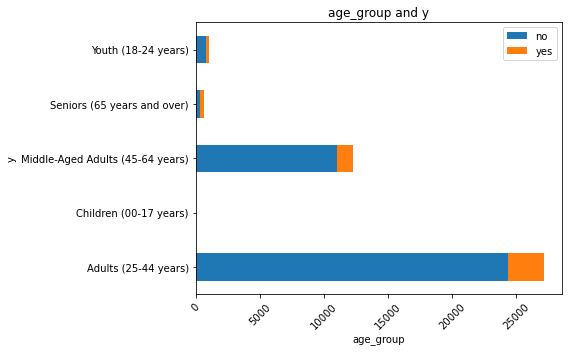

In [95]:
plot_crosstab(df, 'age_group', 'y')

In [96]:
age_y = pd.crosstab(df['age_group'], df['y'])
age_y['% Yes'] = age_y['yes']/(age_y['no']+age_y['yes'])
age_y['% No'] = age_y['no']/(age_y['no']+age_y['yes'])
age_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
age_group,,,,
Seniors (65 years and over),350,313,0.472097,0.527903
Children (00-17 years),3,2,0.400000,0.600000
Youth (18-24 years),809,254,0.238946,0.761054
Adults (25-44 years),24352,2834,0.104245,0.895755
Middle-Aged Adults (45-64 years),11034,1237,0.100807,0.899193


While adults are our main customers, seniors/children/youth were shown to subscribe after the phone call more than other age group. There is very little data points for Children though. We'll take the age for modelling later on. 

#### B) Job

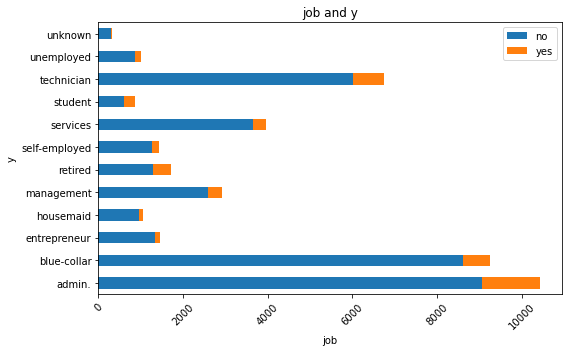

In [97]:
plot_crosstab(df, 'job', 'y')

In [98]:
job_y = pd.crosstab(df['job'], df['y'])
job_y['% Yes'] = job_y['yes']/(job_y['no']+job_y['yes'])
job_y['% No'] =job_y['no']/(job_y['no']+job_y['yes'])
job_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
job,,,,
student,600,275,0.314286,0.685714
retired,1286,434,0.252326,0.747674
unemployed,870,144,0.142012,0.857988
admin.,9070,1352,0.129726,0.870274
management,2596,328,0.112175,0.887825
unknown,293,37,0.112121,0.887879
technician,6013,730,0.108260,0.891740
self-employed,1272,149,0.104856,0.895144
housemaid,954,106,0.100000,0.900000


While most of our customers have admin job, students groups were shown to subscribe after the phone call more than the admin group. We'll take the 'job' column for modelling later on.

#### C) Marital

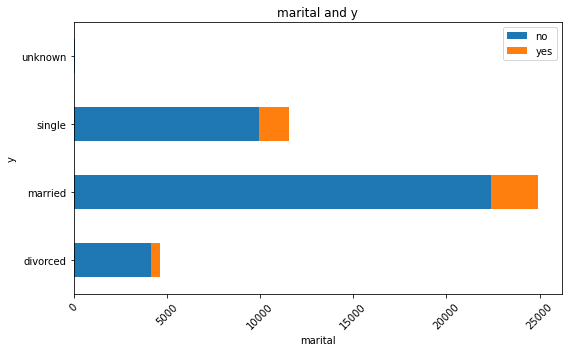

In [99]:
plot_crosstab(df, 'marital', 'y')

In [100]:
marital_y = pd.crosstab(df['marital'], df['y'])
marital_y['% Yes'] = marital_y['yes']/(marital_y['no']+marital_y['yes'])
marital_y['% No'] =marital_y['no']/(marital_y['no']+marital_y['yes'])
marital_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
marital,,,,
unknown,68,12,0.150000,0.850000
single,9948,1620,0.140041,0.859959
divorced,4136,476,0.103209,0.896791
married,22396,2532,0.101573,0.898427


While most of our customers are married, single groups were shown to subscribe after the phone call more than married group. We'll take 'marital' for modelling later on.

#### D) Education

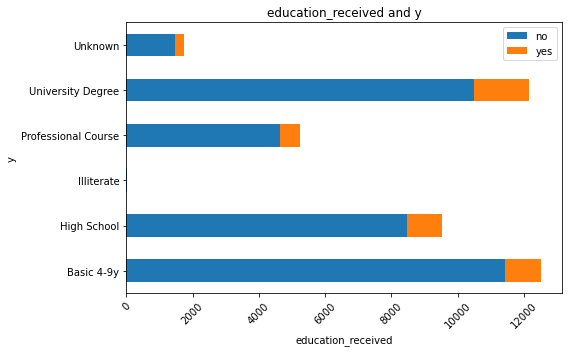

In [101]:
plot_crosstab(df, 'education_received', 'y')

In [102]:
edu_y = pd.crosstab(df['education_received'], df['y'])
edu_y['% Yes'] = edu_y['yes']/(edu_y['no']+edu_y['yes'])
edu_y['% No'] =edu_y['no']/(edu_y['no']+edu_y['yes'])
edu_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
education_received,,,,
Illiterate,14,4,0.222222,0.777778
Unknown,1480,251,0.145003,0.854997
University Degree,10498,1670,0.137245,0.862755
Professional Course,4648,595,0.113485,0.886515
High School,8484,1031,0.108355,0.891645
Basic 4-9y,11424,1089,0.087029,0.912971


Customers with University Degree is most likely to subscribe than any other education group. 
Too little sample size is available for Illiterate group but illiterate group tend to subscribe after the phone call more than other age group. We'll take 'education' for modelling later on.

#### C) Default Status

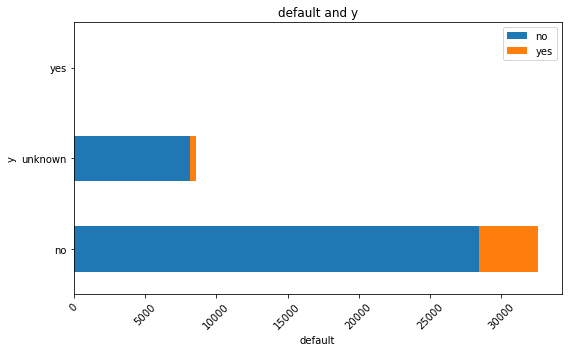

In [103]:
plot_crosstab(df, 'default', 'y')

In [104]:
default_y = pd.crosstab(df['default'], df['y'])
default_y['% Yes'] = default_y['yes']/(default_y['no']+default_y['yes'])
default_y['% No'] =default_y['no']/(default_y['no']+default_y['yes'])
default_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
default,,,,
no,28391,4197,0.12879,0.87121
unknown,8154,443,0.05153,0.94847
yes,3,0,0.00000,1.00000


Customers who do not have their credit in default tend to subscribe more to phone calls.

#### D) Housing Status

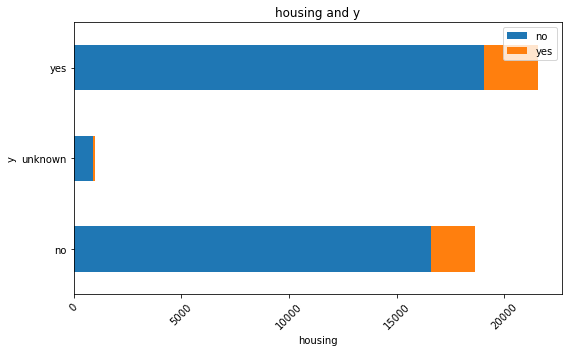

In [105]:
plot_crosstab(df, 'housing', 'y')

In [106]:
housing_y = pd.crosstab(df['housing'], df['y'])
housing_y['% Yes'] = housing_y['yes']/(housing_y['no']+housing_y['yes'])
housing_y['% No'] =housing_y['no']/(housing_y['no']+housing_y['yes'])
housing_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
housing,,,,
yes,19069,2507,0.116194,0.883806
no,16596,2026,0.108796,0.891204
unknown,883,107,0.108081,0.891919


Customers responded to phone calls and subscribed at similar proportions for all groups. 

#### E) Loan Status

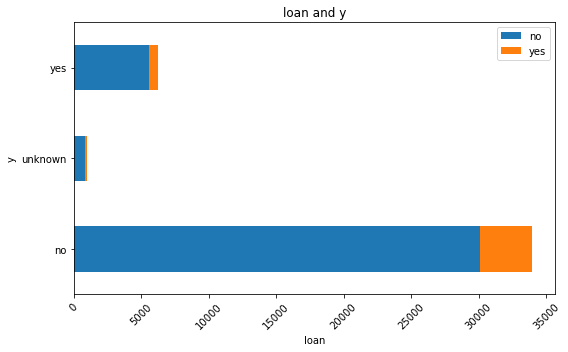

In [107]:
plot_crosstab(df, 'loan', 'y')

In [108]:
loan_y = pd.crosstab(df['loan'], df['y'])
loan_y['% Yes'] = loan_y['yes']/(loan_y['no']+loan_y['yes'])
loan_y['% No'] =loan_y['no']/(loan_y['no']+loan_y['yes'])
loan_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
loan,,,,
no,30100,3850,0.113402,0.886598
yes,5565,683,0.109315,0.890685
unknown,883,107,0.108081,0.891919


Customers responded to phone calls and subscribed at similar proportions for all groups. We won't take 'loan' for modelling.

In [109]:
df_edited = df_edited.drop(['loan'], axis=1)
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'contact', 'month',
       'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'y_num', 'age_group',
       'education_received'],
      dtype='object')

#### F) Contact

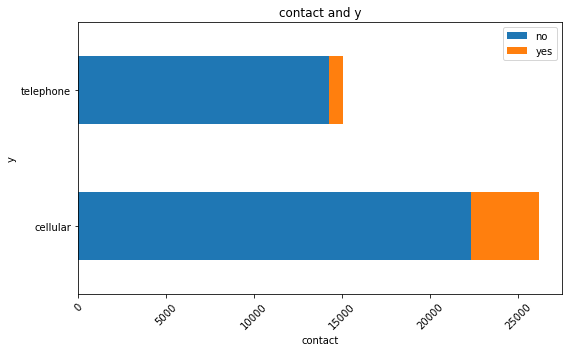

In [110]:
plot_crosstab(df, 'contact', 'y')

In [111]:
contact_y = pd.crosstab(df['contact'], df['y'])
contact_y['% Yes'] = contact_y['yes']/(contact_y['no']+contact_y['yes'])
contact_y['% No'] =contact_y['no']/(contact_y['no']+contact_y['yes'])
contact_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
contact,,,,
cellular,22291,3853,0.147376,0.852624
telephone,14257,787,0.052313,0.947687


Cell phone group subscribed more than the regular telephone group. We'll take 'contact' for modelling.

#### G) Month

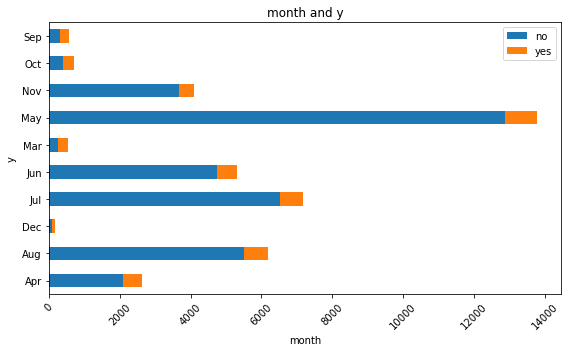

In [112]:
plot_crosstab(df, 'month', 'y')

In [113]:
month_y = pd.crosstab(df['month'], df['y'])
month_y['% Yes'] = month_y['yes']/(month_y['no']+month_y['yes'])
month_y['% No'] =month_y['no']/(month_y['no']+month_y['yes'])
month_y.sort_values('% Yes', ascending = False)

y,no,yes,% Yes,% No
month,,,,
Mar,270,276,0.505495,0.494505
Dec,93,89,0.489011,0.510989
Sep,314,256,0.449123,0.550877
Oct,403,315,0.438719,0.561281
Apr,2093,539,0.204787,0.795213
Aug,5523,655,0.106021,0.893979
Jun,4759,559,0.105115,0.894885
Nov,3685,416,0.101439,0.898561
Jul,6525,649,0.090466,0.909534


Although most calls have been made in May, we observe that March has been more efficient in getting the subscriptions. However, we don't know if this is due to seasonality or specific promotion events or other factors. We also don't know if same trend would be observed for each year as we don't have the information on the year. We won't take this column for modelling and will drop 'month' column.

In [114]:
df_edited = df_edited.drop(['month'], axis=1)
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'contact', 'campaign',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'y_num', 'age_group', 'education_received'],
      dtype='object')

#### H) day_of_week

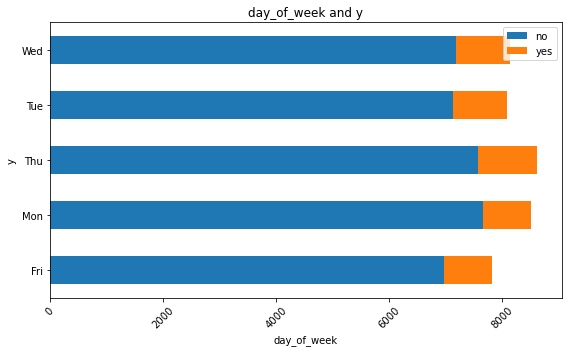

In [115]:
plot_crosstab(df, 'day_of_week', 'y')

Customers responded to phone calls and subscribed at similar proportions for all groups. 'day_of_week' column has also been dropped for modelling previously.

#### H) campaign

We will graph the total number of subscriptions vs the number of contacts that have been made to the customer during the campaign to determine how many times we would need to call the customer to increase the likelihood of them subscribing. 

In [116]:
df_campaign = df.groupby(['campaign']).agg({'y_num':'sum'}).reset_index()

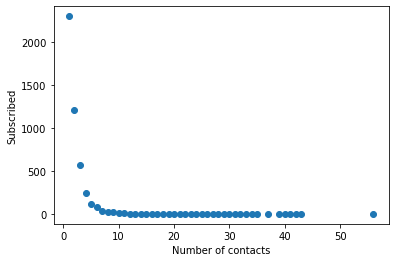

In [117]:
plt.scatter(data=df_campaign, x= 'campaign', y='y_num')
plt.xlabel('Number of contacts')
plt.ylabel('Subscribed');

Contacting same customer more than once doesn't seem to be helping with increasing the subscriptions. We'll take 'campaign' for modelling.

#### I) social and economic context attributes

In [118]:
df_econ = df_edited[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y_num']]
df_econ.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
0,1.1,93.994,-36.4,4.857,5191.0,0
1,1.1,93.994,-36.4,4.857,5191.0,0
2,1.1,93.994,-36.4,4.857,5191.0,0
3,1.1,93.994,-36.4,4.857,5191.0,0
4,1.1,93.994,-36.4,4.857,5191.0,0


In [119]:
df_econ['y_num'] = df_econ['y_num'].astype('int64')
df_econ.dtypes

C:\Users\Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y_num               int64
dtype: object

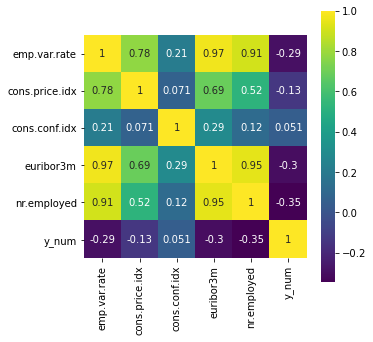

In [120]:
df_econ_corr = df_econ.corr()
ax = plt.subplots(figsize=(5, 5)) 
sns.heatmap(df_econ_corr, cmap="viridis",  square=True, annot=True);

There is very little correlation between the subscription and the 'cons.conf.idx'. We will graph each economic variable with y_num to see if we could better observe the correlations.

#### emp.var.rate: employment variation rate - quarterly indicator (numeric)

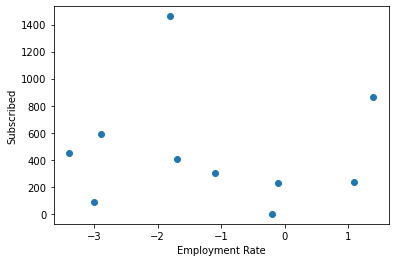

In [121]:
df_emp = df.groupby(['emp.var.rate']).agg({'y_num':'sum'}).reset_index()
plt.scatter(data=df_emp, x= 'emp.var.rate', y='y_num')
plt.xlabel('Employment Rate')
plt.ylabel('Subscribed');

In [122]:
df_edited['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

We'll normalize column 'emp.var.rate' to 0-1 range.

In [123]:
df_edited['emp.var.rate_nor'] =(df_edited['emp.var.rate']-df_edited['emp.var.rate'].min())/(df_edited['emp.var.rate'].max()-df_edited['emp.var.rate'].min())
df_edited['emp.var.rate_nor'].unique()

array([0.9375    , 1.        , 0.6875    , 0.66666667, 0.33333333,
       0.10416667, 0.        , 0.08333333, 0.35416667, 0.47916667])

It is hard to tell if there is a correlation between 'emp.var.rate' and subscriptions. We will take this variable for modelling.

#### nr.employed: number of employees - quarterly indicator (numeric)

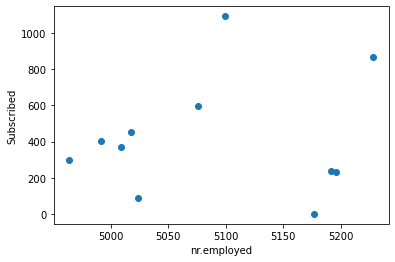

In [124]:
df_nr_employed = df.groupby(['nr.employed']).agg({'y_num':'sum'}).reset_index()
plt.scatter(data=df_nr_employed, x= 'nr.employed', y='y_num')
plt.xlabel('nr.employed')
plt.ylabel('Subscribed');

In [125]:
df_edited['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

We'll normalize column 'nr.employed' to 0-1 range.

In [126]:
df_edited['nr.employed_nor'] =(df_edited['nr.employed']-df_edited['nr.employed'].min())/(df_edited['nr.employed'].max()-df_edited['nr.employed'].min())

In [127]:
df_edited['nr.employed_nor'].unique()

array([0.85973535, 1.        , 0.8778828 , 0.80415879, 0.51228733,
       0.42570888, 0.20378072, 0.22646503, 0.1705104 , 0.10586011,
       0.        ])

There seems to be slight positive correlation between 'nr.employed' and subscriptions. We will take this variable for modelling.

#### cons.price.idx: consumer price index - monthly indicator (numeric)

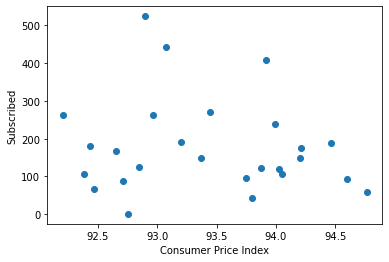

In [128]:
df_cons_price_idx = df.groupby(['cons.price.idx']).agg({'y_num':'sum'}).reset_index()
plt.scatter(data=df_cons_price_idx, x= 'cons.price.idx', y='y_num')
plt.xlabel('Consumer Price Index')
plt.ylabel('Subscribed');

We'll also normalize column 'cons.price.idx' to 0-1 range.

In [129]:
df_edited['cons.price.idx_nor'] =(df_edited['cons.price.idx']-df_edited['cons.price.idx'].min())/(df_edited['cons.price.idx'].max()-df_edited['cons.price.idx'].min())
df_edited['cons.price.idx_nor'].unique()

array([0.69875292, 0.88230709, 0.66913484, 0.48441154, 0.62236945,
       0.3893219 , 0.21628995, 0.25019486, 0.34060795, 0.26968044,
       0.29696025, 0.10444271, 0.        , 0.06936867, 0.08963367,
       0.1745908 , 0.19953235, 0.45518316, 0.60327358, 0.65276695,
       0.72252533, 0.78487919, 0.71161341, 0.7786438 , 0.93530787,
       1.        ])

There seems to be very slight negative correlation between 'cons.price.idx' and subscriptions. We will take this variable for modelling.

#### cons.conf.idx: consumer confidence index - monthly indicator (numeric)

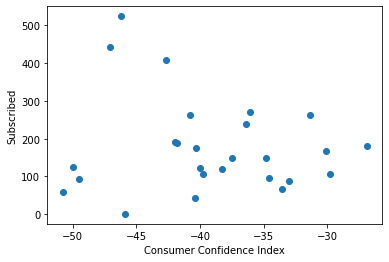

In [130]:
df_cons_conf_idx = df.groupby(['cons.conf.idx']).agg({'y_num':'sum'}).reset_index()
plt.scatter(data=df_cons_conf_idx, x= 'cons.conf.idx', y='y_num')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Subscribed');

We'll also normalize column 'cons.price.idx' to 0-1 range.

In [131]:
df_edited['cons.conf.idx_nor'] =(df_edited['cons.conf.idx']-df_edited['cons.conf.idx'].min())/(df_edited['cons.conf.idx'].max()-df_edited['cons.conf.idx'].min())
df_edited['cons.conf.idx_nor'].unique()

array([0.60251046, 0.37656904, 0.33891213, 0.61506276, 0.43514644,
       0.36820084, 0.20502092, 0.0334728 , 0.15481172, 0.19246862,
       0.41841004, 0.71966527, 0.81171548, 0.87866109, 1.        ,
       0.86610879, 0.74476987, 0.66945607, 0.67782427, 0.45188285,
       0.46025105, 0.43933054, 0.52301255, 0.55648536, 0.05439331,
       0.        ])

There seems to be very little positive correlation between 'cons.conf.idx' and subscriptions. However, we will still take the variable.

#### euribor3m: euribor 3 month rate - daily indicator (numeric)

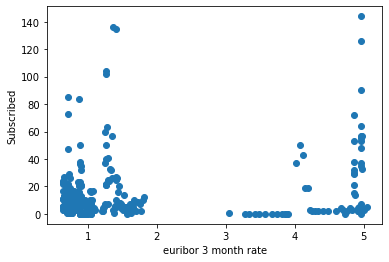

In [132]:
df_euribor = df.groupby(['euribor3m']).agg({'y_num':'sum'}).reset_index()
plt.scatter(data=df_euribor, x= 'euribor3m', y='y_num')
plt.xlabel('euribor 3 month rate')
plt.ylabel('Subscribed');

We'll also normalize column 'euribor3m' to 0-1 range.

In [133]:
df_edited['euribor3m_nor'] =(df_edited['euribor3m']-df_edited['euribor3m'].min())/(df_edited['euribor3m'].max()-df_edited['euribor3m'].min())
# df_edited['euribor3m_nor'].unique()

We'll also take 'euribor3m_nor' for modelling.

<h1> Part 2. Model building for Predictive Analysis</h1>

<h2> 2.1. Logistic Regression</h2><br>
Logistic Regression will be used for predicting binary outcome. (Customers will subscribe or not subscribe)

<h3> 2.1.1. Final Data Cleaning and feature engineering for df_edited and df</h3><br>

<h3> df_edited: cleaned, manipulated data </h3>

In [134]:
df_edited.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'contact', 'campaign',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'y_num', 'age_group', 'education_received',
       'emp.var.rate_nor', 'nr.employed_nor', 'cons.price.idx_nor',
       'cons.conf.idx_nor', 'euribor3m_nor'],
      dtype='object')

We'll remove the original columns which won't be used for modelling.

In [135]:
df_edited = df_edited.drop(['age', 'education', 'y', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)
df_edited.columns

Index(['job', 'marital', 'housing', 'contact', 'campaign', 'y_num',
       'age_group', 'education_received', 'emp.var.rate_nor',
       'nr.employed_nor', 'cons.price.idx_nor', 'cons.conf.idx_nor',
       'euribor3m_nor'],
      dtype='object')

We'll rename the remaining columns to keep them short.

In [136]:
df_edited.rename(columns={'age_group':'age', 'education_received':'education', 'nr.employed_nor':'nr.employed',
       'cons.price.idx_nor':'cons.price.idx', 'cons.conf.idx_nor':'cons.conf.idx', 'euribor3m_nor':'euribor3m',
       'emp.var.rate_nor':'emp.var.rate'}, inplace=True)
df_edited.columns

Index(['job', 'marital', 'housing', 'contact', 'campaign', 'y_num', 'age',
       'education', 'emp.var.rate', 'nr.employed', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m'],
      dtype='object')

In [137]:
df_edited['y_num'] = df_edited['y_num'].astype('int64')
df_edited.dtypes

job                object
marital            object
housing            object
contact            object
campaign            int64
y_num               int64
age                object
education          object
emp.var.rate      float64
nr.employed       float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
dtype: object

#### Categorical Encoding

We'll use one hot encoding to create dummy variables for all the categorical variables: job, marital, default, contact, age, education

In [138]:
df_edited_dummies = pd.get_dummies(df_edited[['job', 'marital', 'housing', 'contact', 'age', 'education']])
df_edited_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age_Adults (25-44 years),age_Children (00-17 years),age_Middle-Aged Adults (45-64 years),age_Seniors (65 years and over),age_Youth (18-24 years),education_Basic 4-9y,education_High School,education_Illiterate,education_Professional Course,education_University Degree
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


We'll then concatenate these dummy variables with the numerical variables of the original df_edited dataframe. 

In [139]:
df_edited_encoded = pd.concat([df_edited[['campaign', 'emp.var.rate', 'nr.employed', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y_num']],df_edited_dummies],axis=1)
df_edited_encoded.head(10) #all numerical data concatenated together

,campaign,emp.var.rate,nr.employed,cons.price.idx,cons.conf.idx,euribor3m,y_num,job_admin.,job_blue-collar,job_entrepreneur,...,age_Adults (25-44 years),age_Children (00-17 years),age_Middle-Aged Adults (45-64 years),age_Seniors (65 years and over),age_Youth (18-24 years),education_Basic 4-9y,education_High School,education_Illiterate,education_Professional Course,education_University Degree
0,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
8,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
11,1,0.9375,0.859735,0.698753,0.60251,0.957379,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [140]:
df_edited_encoded.columns

Index(['campaign', 'emp.var.rate', 'nr.employed', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y_num', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'age_Adults (25-44 years)',
       'age_Children (00-17 years)', 'age_Middle-Aged Adults (45-64 years)',
       'age_Seniors (65 years and over)', 'age_Youth (18-24 years)',
       'education_Basic 4-9y', 'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree'],
      dtype='object')

We'll assign all the input variables to X_edited, and the output variable to y_edited.

In [141]:
X_edited = df_edited_encoded.loc[:,['campaign', 'emp.var.rate', 'nr.employed', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'age_Adults (25-44 years)',
       'age_Children (00-17 years)', 'age_Middle-Aged Adults (45-64 years)',
       'age_Seniors (65 years and over)', 'age_Youth (18-24 years)',
       'education_Basic 4-9y', 'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree']]
y_edited = df_edited_encoded.loc[:,'y_num']

In [142]:
y_edited = y_edited.astype('int64')

We'll do the same for the df dataframe (full feature data).

<h3> df: original raw data with minimal cleaning </h3>

In [143]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num', 'age_group',
       'education_received'],
      dtype='object')

We'll only keep the original columns. For 'age', we'll be taking the original numerical variable. 

In [144]:
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num']]
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num'],
      dtype='object')

In [145]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
y_num              object
dtype: object

We'll use one hot encoding to create dummy variables for all the categorical variables: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

In [146]:
df_dummies = pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']])
df_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_Oct,month_Sep,day_of_week_Fri,day_of_week_Mon,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


We'll then concatenate these dummy variables with the numerical variables of the original df dataframe: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

In [147]:
df_encoded = pd.concat([df[['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_num']],df_dummies],axis=1)
df_encoded.head(10) #all numerical data concatenated together

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_Oct,month_Sep,day_of_week_Fri,day_of_week_Mon,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
5,45,198,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
7,41,217,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
8,24,380,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
9,25,50,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [148]:
df_encoded.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_num',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 

We'll assign all the input variables to X, and the output variable to y.

In [149]:
X = df_encoded.loc[:,['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',  
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Thu',
       'day_of_week_Tue', 'day_of_week_Wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']]
y = df_encoded.loc[:,'y_num']

In [150]:
y=y.astype('int64')

<h3> 2.1.2. Logistic regression on full feature data </h3>

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

We'll split the dataset into train dataset and the test dataset. 

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [153]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27595, 63)
(27595,)
(13593, 63)
(13593,)


We will then run logistic regression model on the train dataset.

In [154]:
# Logistic Regression
model_lg = LogisticRegression(solver='liblinear')
# Fit the model according to the given training data.
model_lg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [155]:
# Return the mean accuracy on the given test data and labels.
model_lg.score(X_train,y_train)

0.9073382859213626

We'll make predictions using the logistic regressions model on the test dataset. 

In [156]:
y_pred = model_lg.predict(X_test)
y_actual = y_test 

In [157]:
# Return the mean accuracy on the given test X values and test y values.
model_lg.score(X_test, y_test)

0.9108364599426175

Since the accuracy score for both train dataset and test dataset is similar, we can say that the model is not overfitting.

In [158]:
# Confusion Matrix
confusion_matrix(y_actual, y_pred)

array([[11783,   296],
       [  916,   598]], dtype=int64)

True Positive (upper-left): Number of positives we predicted correctly<br>
True Negative (lower-right): Number of negatives we predicted correctly<br>
False Positive (top-right): Number of positive we predicted wrongly<br>
False Negative (lower-left): Number of negatives we predicted wrongly

In [159]:
print(model_lg.coef_)

[[ 2.88926396e-03  4.60335934e-03 -3.61209019e-02  1.64018499e-01
   4.37966815e-02 -2.47486332e-01  3.20808511e-01  4.39988606e-02
  -2.69673093e-01 -6.11512688e-03  2.39185937e-02 -7.56218597e-02
  -7.72714925e-04  1.97502110e-03  1.31307010e-02  2.46265223e-02
  -2.01464033e-03 -1.88817490e-02  2.10721582e-02  1.18511451e-02
   4.18766588e-03 -2.04278964e-04 -5.92349835e-03 -3.44601749e-02
   4.38558920e-02 -2.05654291e-04 -1.38120136e-02 -1.37932635e-02
  -3.22216043e-02 -1.42875842e-02  4.95186515e-04  7.17542739e-03
   6.24186282e-02  7.29178792e-03  5.87895551e-02 -5.55149809e-02
  -8.00971212e-06 -1.27821901e-03 -5.16727718e-03  9.71206066e-03
   1.34487675e-02 -5.16727718e-03 -5.01492580e-03  8.31694082e-02
  -7.99028437e-02  1.78093358e-02  2.87309278e-02  4.79661439e-03
   3.86161605e-02  3.83594451e-02  4.96296707e-02 -1.84776181e-01
  -1.05675723e-02  1.58371991e-02  4.83096412e-03 -2.87043734e-02
  -1.51666262e-02  1.94565194e-02  2.70308884e-02  6.50156353e-04
  -6.64242

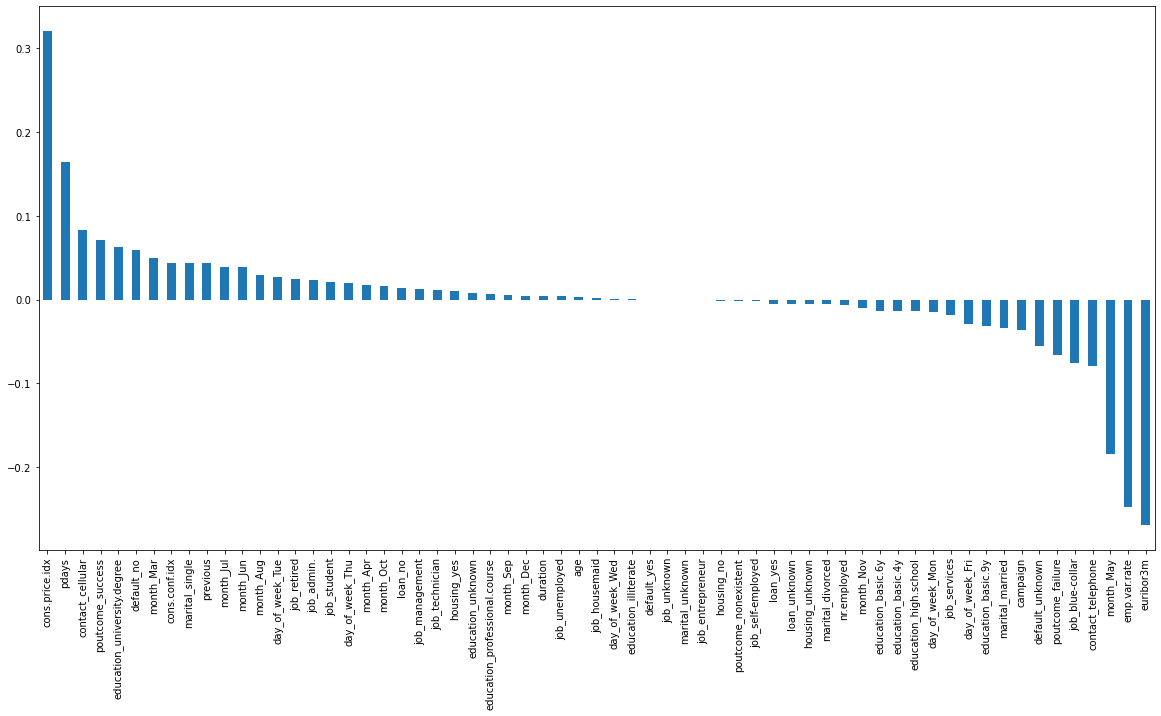

In [160]:
pd.Series(model_lg.coef_[0,:], index=X.columns).sort_values(ascending=False).plot(kind='bar', figsize=(20,10));

We'll convert the coefficient values to absolute values to compare only the magnitudes of the coefficients.

In [161]:
lg_coef_absolute = abs(model_lg.coef_)[0,:]
lg_coef_absolute

array([2.88926396e-03, 4.60335934e-03, 3.61209019e-02, 1.64018499e-01,
       4.37966815e-02, 2.47486332e-01, 3.20808511e-01, 4.39988606e-02,
       2.69673093e-01, 6.11512688e-03, 2.39185937e-02, 7.56218597e-02,
       7.72714925e-04, 1.97502110e-03, 1.31307010e-02, 2.46265223e-02,
       2.01464033e-03, 1.88817490e-02, 2.10721582e-02, 1.18511451e-02,
       4.18766588e-03, 2.04278964e-04, 5.92349835e-03, 3.44601749e-02,
       4.38558920e-02, 2.05654291e-04, 1.38120136e-02, 1.37932635e-02,
       3.22216043e-02, 1.42875842e-02, 4.95186515e-04, 7.17542739e-03,
       6.24186282e-02, 7.29178792e-03, 5.87895551e-02, 5.55149809e-02,
       8.00971212e-06, 1.27821901e-03, 5.16727718e-03, 9.71206066e-03,
       1.34487675e-02, 5.16727718e-03, 5.01492580e-03, 8.31694082e-02,
       7.99028437e-02, 1.78093358e-02, 2.87309278e-02, 4.79661439e-03,
       3.86161605e-02, 3.83594451e-02, 4.96296707e-02, 1.84776181e-01,
       1.05675723e-02, 1.58371991e-02, 4.83096412e-03, 2.87043734e-02,
      

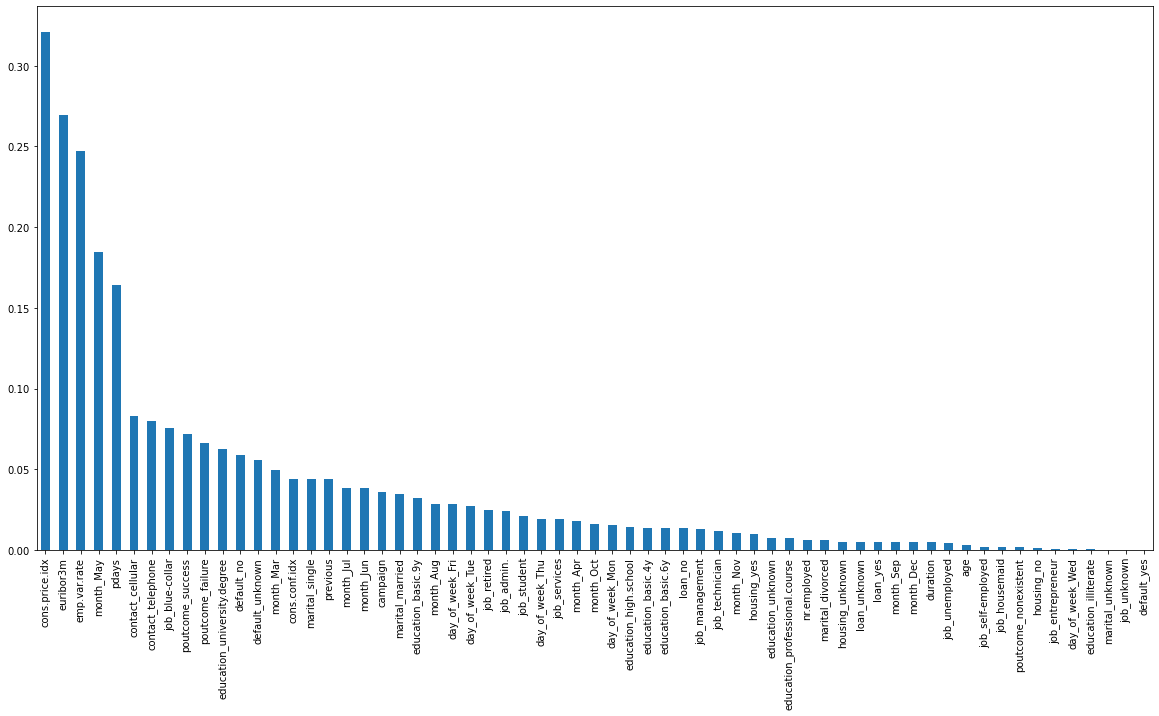

In [162]:
pd.Series(lg_coef_absolute, index=X.columns).sort_values(ascending=False).plot(kind='bar', figsize=(20,10));

cons.price.idx, euribor.3m, emp.var.rate, month_May, pdays, contact_cellular, contact_telephone, job_blue-collar, poutcome_success, poutcome_failure were the top 10 important features to consider when deciding whether consumers subscribe to the deposit or not.

#### Model Validation

In [163]:
# Model valdiation steps

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy = accuracy_score(y_actual, y_pred)

precision = results[0]
recall = results[1]
fscore = results[2]

print(precision)
print(recall)
print(fscore)
print(accuracy)

0.7983860696107234
0.6852374225472705
0.7238816906756583
0.9108364599426175


<b>Precision:</b> the ratio of correctly predicted positive observations to the total predicted positive observations. <br>
Precision = TP/(TP+FP) <br>

<b>Recall:</b> the ratio of correctly predicted positive observations to the all observations in actual class - yes. <br>
Recall (Sensitivity) = TP/(TP+FN) <br>

<b>F1 score:</b> the weighted average of Precision and Recall. <br>
F1 Score = 2*(Recall*Precision)/(Recall+Precision) <br>

<b>Accuracy:</b> the ratio of correctly predicted observation to the total observations <br>
Accuracy = (TP+TN)/(TP+FP+FN+TN)

#### Logistic regression on the full feature data

- Among customers that predicted to subscribe, 79.8% of the customers that were predicted to subscribe actually subscribed to the term deposit. 

- Of all the customers that truly subscribed, 68.5% of the customers were labelled as subscribed to the term deposit.

- F1 score is 72.4%

- The model correctly predicted 91.1% of the total observations

<h3> 2.1.3. Logistic regression on your selected and massaged data </h3>

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

We'll split the dataset into train dataset and the test dataset. 

In [165]:
X_edited_train, X_edited_test, y_edited_train, y_edited_test = train_test_split(X_edited, y_edited, test_size=0.4, random_state=0)

In [166]:
print(X_edited_train.shape)
print(y_edited_train.shape)
print(X_edited_test.shape)
print(y_edited_test.shape)

(22947, 34)
(22947,)
(15298, 34)
(15298,)


We will then run logistic regression model on the train dataset.

In [167]:
# Logistic Regression
model_lg_updated = LogisticRegression(solver='liblinear')
# Fit the model according to the given training data.
model_lg_updated.fit(X_edited_train,y_edited_train)

LogisticRegression(solver='liblinear')

In [168]:
# Return the mean accuracy on the given train X values and train y values.
model_lg_updated.score(X_edited_train,y_edited_train)

0.8922299211225868

We'll make predictions using the logistic regressions model on the test dataset. 

In [169]:
y_pred_updated = model_lg_updated.predict(X_edited_test)
y_actual_updated = y_edited_test

In [170]:
# Return the mean accuracy on the given test X values and test y values.
model_lg_updated.score(X_edited_test, y_edited_test)

0.8946921166165512

Since the accuracy score for both train dataset and test dataset is similar, we can say that the model is not overfitting.

In [171]:
print(model_lg_updated.coef_)

[[-0.04776402 -3.07064208 -1.02569917  2.83795383  1.18798175  0.37893766
   0.01746176 -0.23564584 -0.20479913 -0.15765827 -0.07848853  0.11381217
  -0.0975147  -0.30807641  0.25692842  0.07345802  0.12990308 -0.17868086
  -0.17461399 -0.13732457 -0.22279111 -0.26782831  0.24737167 -0.73799109
  -0.25962397  0.         -0.28985097  0.01033352  0.04852201 -0.31371258
  -0.2458576   0.51084003 -0.27153016 -0.17035911]]


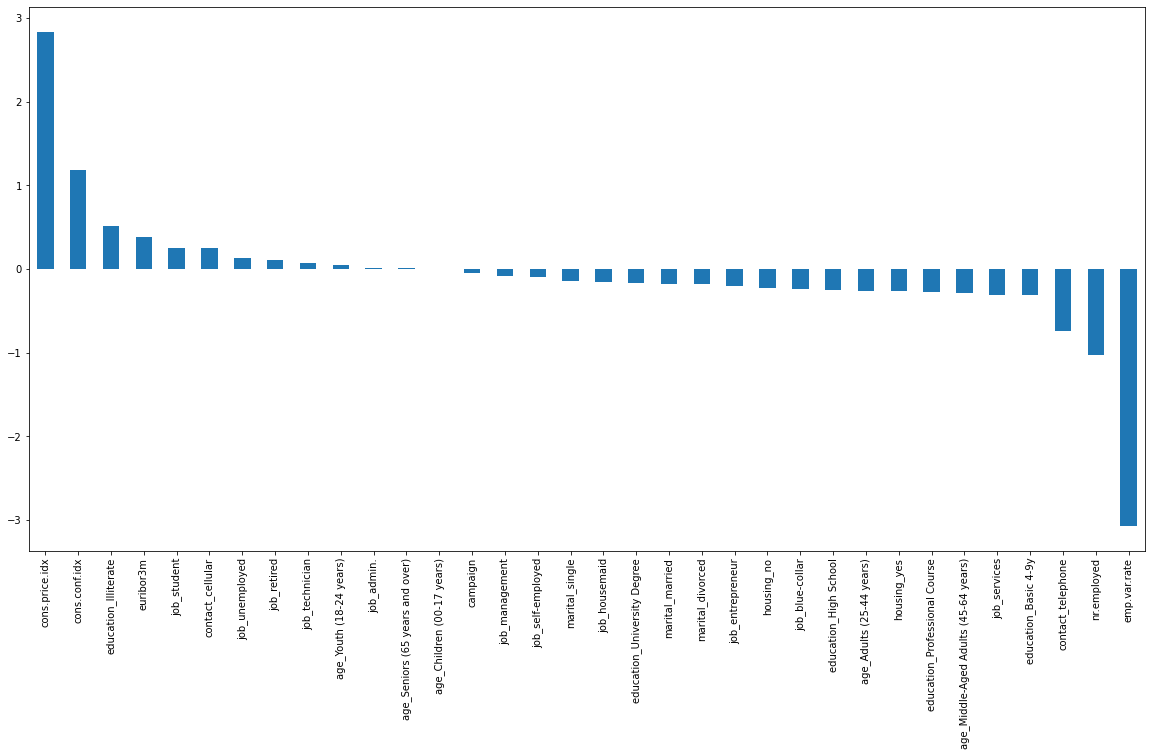

In [172]:
pd.Series(model_lg_updated.coef_[0,:], index=X_edited.columns).sort_values(ascending=False).plot(kind='bar', figsize=(20,10));

In [173]:
lg_coef_absolute_updated = abs(model_lg_updated.coef_)[0,:]
lg_coef_absolute_updated

array([0.04776402, 3.07064208, 1.02569917, 2.83795383, 1.18798175,
       0.37893766, 0.01746176, 0.23564584, 0.20479913, 0.15765827,
       0.07848853, 0.11381217, 0.0975147 , 0.30807641, 0.25692842,
       0.07345802, 0.12990308, 0.17868086, 0.17461399, 0.13732457,
       0.22279111, 0.26782831, 0.24737167, 0.73799109, 0.25962397,
       0.        , 0.28985097, 0.01033352, 0.04852201, 0.31371258,
       0.2458576 , 0.51084003, 0.27153016, 0.17035911])

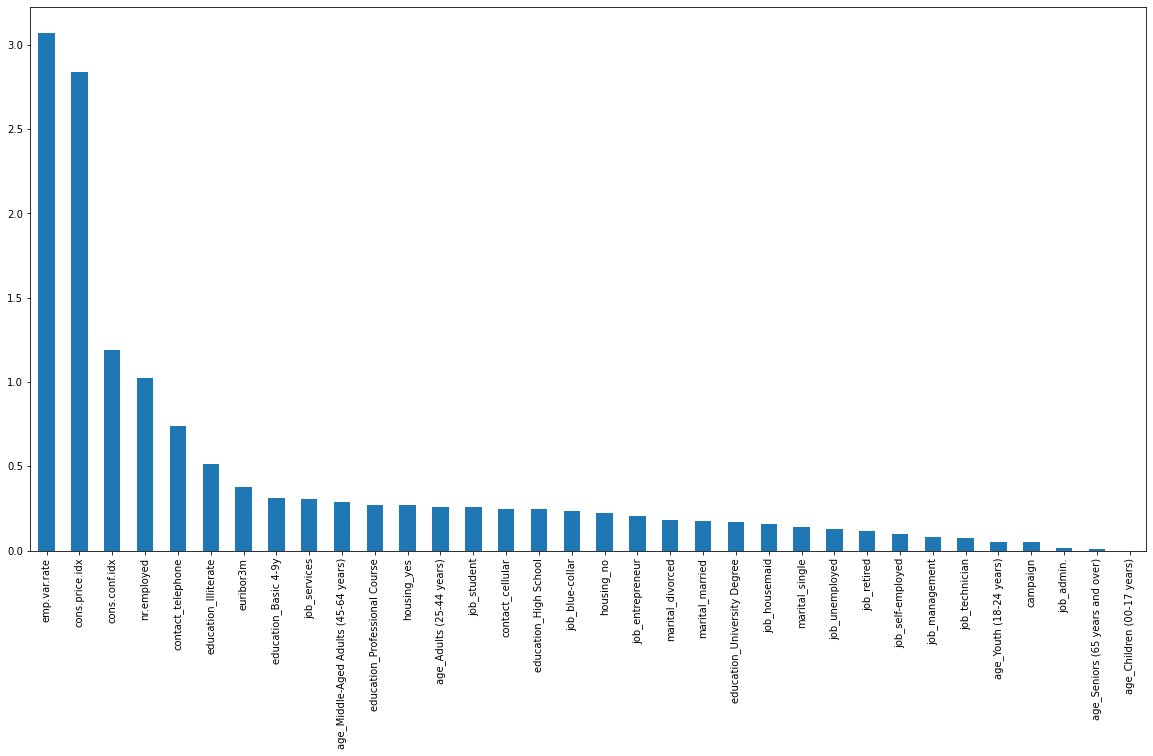

In [174]:
pd.Series(lg_coef_absolute_updated, index=X_edited.columns).sort_values(ascending=False).plot(kind='bar', figsize=(20,10));

emp.var.rate, cons.price.idx, cons.conf.idx, nr.employed, contact_telephone, education_illiterate, euribor3m, education_Basic_4-9y, job_services, age_Middle_Aged_Adults (45-64 years) were the top 10 important features to consider when deciding whether consumers subscribe to the deposit or not.

In [175]:
# Confusion Matrix
confusion_matrix(y_actual_updated, y_pred_updated)

array([[13329,   295],
       [ 1316,   358]], dtype=int64)

In [176]:
# Model valdiation steps

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual_updated, y_pred_updated, average='macro')
accuracy = accuracy_score(y_actual_updated, y_pred_updated)

precision = results[0]
recall = results[1]
fscore = results[2]

print(precision)
print(recall)
print(fscore)
print(accuracy)

0.7291894384559119
0.596103027477689
0.6253520436901525
0.8946921166165512


#### Logistic Regression on selected and massaged data

- Among customers that predicted to subscribe, 73.0% of the customers that were predicted to subscribe actually subscribed to the term deposit. 

- Of all the customers that truly subscribed, 59.7% of the customers were labelled as subscribed to the term deposit.

- F1 score is 62.7%

- The model correctly predicted 89.5% of the total observations

Modelling on full feature data actually gave better results than the cleaned, manipulated data. There is a possibility that the variables which were removed likely contributed to the customer subscription to the term deposit. 

<h2> 2.2. Decision Tree</h2><br>
Decision Tree will be used for predicting binary outcome. (Customers will subscribe or not subscribe)

<h3> 2.2.1. Decision tree on full feature data </h3>

In [177]:
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

In [178]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Create a decision tree and fit it into the training data
model_dt = DecisionTreeClassifier(max_depth=11)
model_dt = model_dt.fit(X_train, y_train)
model_dt.score(X_train,y_train) # mean accuracy on the given train data and labels

0.9492958886370993

In [179]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_dt.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support

results2 = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy2 = accuracy_score(y_actual, y_pred)

precision_dt = results2[0]
recall_dt = results2[1]
fscore_dt = results2[2]

print(precision_dt)
print(recall_dt)
print(fscore_dt)
print(accuracy2)

0.7769833571199813
0.7581312527506623
0.7670794181156729
0.9115076474872542


In [180]:
# Confusion Matrix
confusion_matrix(y_actual, y_pred)

array([[13996,   659],
       [  799,  1022]], dtype=int64)

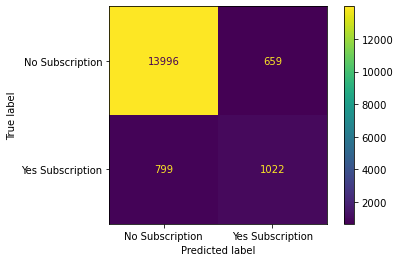

In [181]:
plot_confusion_matrix(model_dt, X_test, y_test, display_labels=['No Subscription', 'Yes Subscription']);

In [182]:
model_dt

DecisionTreeClassifier(max_depth=11)

In [183]:
feat_imp = model_dt.feature_importances_

feat_imp

array([4.71302848e-02, 4.02702720e-01, 2.11408840e-02, 3.57855834e-02,
       6.36353500e-03, 5.96409716e-04, 9.62503195e-03, 2.80062028e-02,
       6.57350022e-02, 2.43596667e-01, 3.43257150e-03, 3.52617434e-03,
       1.85935039e-03, 1.20861934e-03, 2.01703683e-03, 4.21301951e-03,
       1.27121533e-03, 5.67983512e-03, 2.37024244e-03, 4.52764000e-03,
       4.53468169e-03, 1.41862456e-03, 1.14192611e-03, 1.70171272e-03,
       5.92093155e-03, 0.00000000e+00, 1.31148483e-03, 2.69518285e-03,
       3.00424725e-03, 6.24851968e-03, 0.00000000e+00, 4.78301608e-03,
       6.34879454e-03, 1.40018570e-03, 5.45010187e-04, 2.92339515e-03,
       0.00000000e+00, 1.31247351e-03, 0.00000000e+00, 4.38874029e-03,
       2.14967743e-03, 5.45010187e-04, 4.28006984e-03, 4.71870292e-04,
       4.02398337e-03, 0.00000000e+00, 0.00000000e+00, 1.71802188e-03,
       1.49660177e-03, 1.18017859e-03, 1.36842385e-04, 1.36363440e-03,
       1.64996420e-03, 7.35280522e-03, 0.00000000e+00, 3.81101704e-03,
      

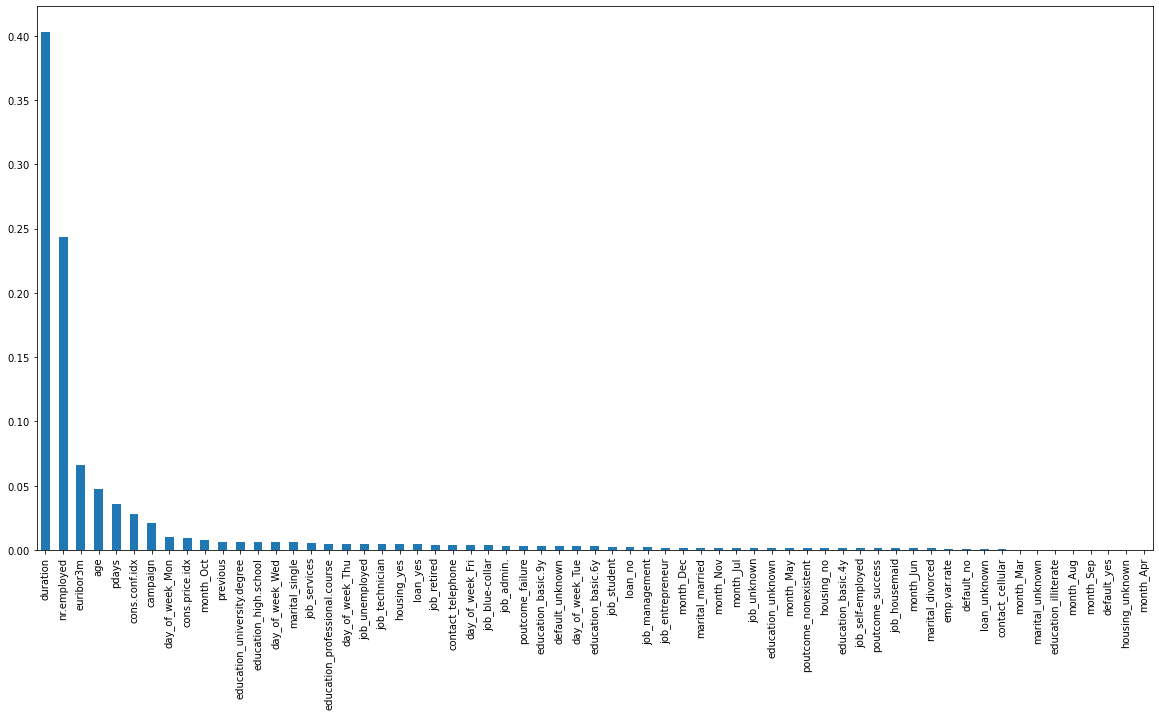

In [184]:
pd.Series(model_dt.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar', figsize=(20,10));

Duration, nr.employed, euribor3m, age, pdays, cons.conf.idx, campaign, days_of_week_Mon, month_Oct, cons.price.idx were the top 10 important features to consider when deciding which customers subscribe to the deposit or not. 

#### Decision Tree on full feature data

- Among customers that predicted to subscribe, 77.8% of the customers that were predicted to subscribe actually subscribed to the term deposit. 

- Of all the customers that truly subscribed, 75.6% of the customers were labelled as subscribed to the term deposit.

- F1 score is 76.6%

- The model correctly predicted 91.2% of the total observations

<h3> 2.2.2. Decision tree on your selected and massaged data </h3>

In [185]:
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

In [186]:
# Split the data into training and testing sets
X_edited_train, X_edited_test, y_edited_train, y_edited_test = train_test_split(X_edited, y_edited, test_size=0.33, random_state=0)

# Create a decision tree and fit it into the training data
model_dt_updated = DecisionTreeClassifier(max_depth=11)
model_dt_updated = model_dt_updated.fit(X_edited_train, y_edited_train)
model_dt_updated.score(X_edited_train,y_edited_train)

0.9160942866063065

In [187]:
# Model valdiation steps
y_actual_updated = y_edited_test 
y_pred_updated =  model_dt_updated.predict(X_edited_test)


from sklearn.metrics import precision_recall_fscore_support

results2 = precision_recall_fscore_support(y_actual_updated, y_pred_updated, average='macro')
accuracy2 = accuracy_score(y_actual_updated, y_pred_updated)

precision_dt = results2[0]
recall_dt = results2[1]
fscore_dt = results2[2]

print(precision_dt)
print(recall_dt)
print(fscore_dt)
print(accuracy2)

0.7129206550771395
0.6235354819310044
0.6512981321852
0.892876951113224


In [188]:
# Confusion Matrix
confusion_matrix(y_actual_updated, y_pred_updated)

array([[10887,   369],
       [  983,   382]], dtype=int64)

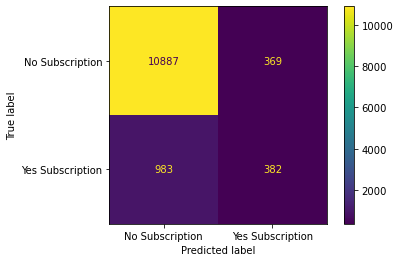

In [189]:
plot_confusion_matrix(model_dt_updated, X_edited_test, y_edited_test, display_labels=['No Subscription', 'Yes Subscription']);

In [190]:
model_dt_updated

DecisionTreeClassifier(max_depth=11)

In [191]:
feat_imp_updated = model_dt_updated.feature_importances_

feat_imp_updated

array([0.05356956, 0.01602671, 0.43914571, 0.03407644, 0.05354159,
       0.15534967, 0.01079492, 0.00649777, 0.00366353, 0.00612428,
       0.00899433, 0.01533659, 0.00562042, 0.00736824, 0.00584609,
       0.00965561, 0.00235892, 0.00611456, 0.01305148, 0.01196996,
       0.01424144, 0.01359629, 0.00365767, 0.02139871, 0.00914401,
       0.        , 0.00946472, 0.00676754, 0.00855371, 0.00894656,
       0.01204183, 0.00087485, 0.01039651, 0.01580976])

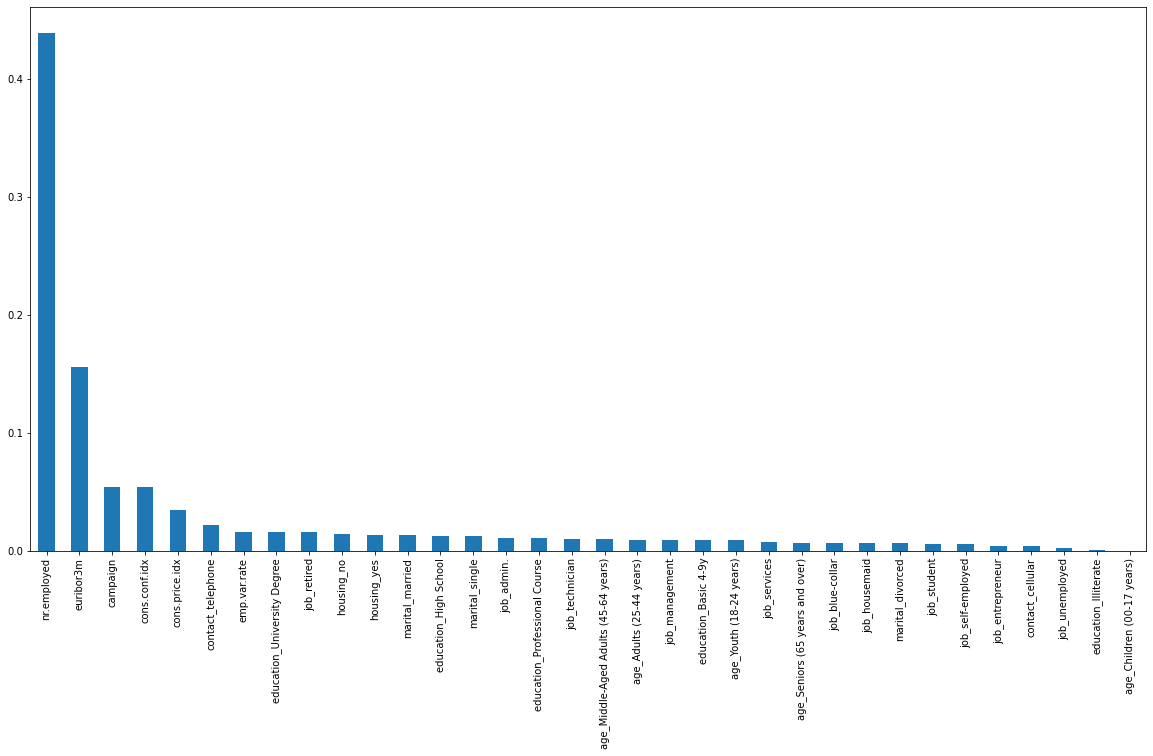

In [192]:
pd.Series(model_dt_updated.feature_importances_, index=X_edited.columns).sort_values(ascending=False).plot(kind='bar', figsize=(20,10));

nr.employed, euribor3m, cons.conf.idx, campaign, cons.price.idx, contact_cellular, housing_yes, job_retired, education_university_degree, marital_married were the top 10 important features to consider when deciding whether consumers subscribe to the deposit or not.

#### Decision Tree on selected and massaged data

- Among customers that predicted to subscribe, 71.0% of the customers that were predicted to subscribe actually subscribed to the term deposit. 

- Of all the customers that truly subscribed, 62.1% of the customers were labelled as subscribed to the term deposit.

- F1 score is 64.9%

- The model correctly predicted 89.2% of the total observations

Modelling on full feature data actually gave better results than the cleaned, manipulated data for Decision Tree as well. There is a possibility that the variables which were removed likely contributed to the customer subscription to the term deposit. 

<h1> Part 3. Key Findings </h1>

<h2> 3.1 Past findings</h2>

<h3> Hypothesis:</h3><br>
•	<b>Age</b>: Over 40 years of age will more likely to subscribe than younger ones as they tend to be more financially established.<br>
•	<b>Job</b>: 'entrepreneur', 'management', 'retired', 'self-employed', 'technician' will be more likely to subscribe than 'blue-collar', 'housemaid', 'services, 'student', 'unemployed' as they have more income.<br>
•	<b>Marital</b>: Married people will be more likely to subscribe than single?<br>
•	<b>Default</b>: people with credit default will not likely/will be unable to subscribe<br>
•	<b>Housing</b>: people with higher loans will not likely to subscribe<br> 
•	<b>Loan</b>: people with higher personal loans will not likely to subscribe<br>
•	<b>Education</b>: people with higher personal education will likely subscribe as they may have higher income.<br>
    •	<b>contact</b>: Cell phone group would subscribe more than the regular telephone group.<br>
    •	<b>Month</b>: Month wouldn't affect the amount of subscriptions.<br>
    •	<b>previous</b>: Contacting same customer more than once will help with increasing the subscriptions.<br>

<h3> Actual Findings:</h3><br>
    •	<b>Age</b>: While Adults (25-44 years) were our main customers, seniors (65 years and over) tend to subscribe more after calling.<br>
    •	<b>Job</b>: While most of our customers have admin job, students groups were shown to subscribe after the phone call more than the admin group.<br>
    •	<b>Marital</b>: While most of our customers are married, single groups were shown to subscribe after the phone call more than married group.<br>
    •	<b>Default</b>: Customers who do not have their credit in default tend to subscribe more to phone calls.<br>
    •	<b>Housing</b>: people with higher loans will not likely to subscribe<br> 
    •	<b>Loan</b>: Loan status did not influence customer's decision for subscribing.<br>
    •	<b>Education</b>: Customers with University Degree is most likely to subscribe than any other education group.<br>
    •	<b>contact</b>: Cell phone group subscribed more than the regular telephone group.<br>
    •	<b>Month</b>: Although most calls have been made in May, we observe that March has been more efficient in getting the subscriptions.<br>
    •	<b>previous</b>: Contacting same customer more than once doesn't seem to be helping with increasing the subscriptions.<br>

<h2> 3.2. Future predictions</h2>

<h3>Model Summary:</h3><br>

- Best model for better accuracy: Decision Tree on full feature data (91.2%)
- Best model for better precision: Logistic Regression on full feature data (79.8%)
- <b> Best model for better recall: Decision Tree on full feature data (75.6%) </b>
- Best model with highest F1 score: Decision Tree on full feature data (76.6%)

Decision tree on full feature data would be best model for predicting customer subscriptions on term deposit. 
If the customers subscribed to the deposit, but we classify them as customers who didn't subscribe to the deposit, then we are missing information on the potential customers who will subscribe in the future. Therefore, as we would like to capture customers who will subscribe to the bank deposit as much as possible, we would like to minimize false negative thus, will choose a model which will give the best recall.

<h3>Factor of influence (based on Decision Tree on full feature data):</h3><br>

Duration is an important factor but as it is not a variable we can control, we'll discard them. Otherwise, <b>nr.employed, euribor3m, age, pdays, cons.conf.idx, campaign, days_of_week_Mon, month_Oct, cons.price.idx</b> were the top 10 important features to consider when deciding which customers subscribe to the deposit or not. 

<h2> 3.3. Recommendations to Marketing Manager </h2>

<h3>Overall Recommendation:</h3><br>

<b>age</b>: Age is shown to affect the subscription according to our model. While we still make a call to adults (25-44 years) who are our majority of customers, we should also increase targeting towards seniors (65 years and over) who showed more efficiency in getting the subscription after the call. 

<b>pdays</b>: While the model suggests pdays is affecting the subscriptions, our past data shows that more than 96% of the customers have not been contacted previously. We need to collect more data on the customers with previous contacts to make further conclusions on how many contact we can make to maximize the subscriptions. 

<b>campaign</b>: Campaign is shown to affect the subscription according to our model. However, our current data shows that for more than 80% of the customers, no more than 3 contacts have been made to prevent customer fatique. We need to collect more data on the frequency of the contacts to further determine how many contacts we can make to maximize the subscriptions. 

<b>days_of_week, month_Oct</b>: days_of_week is shown to affect the subscription according to our model. However, we will need to collect more information on both Year, Quarter, Month, and Day of Week to further understand if there is any seasonality or seasonal events that may be affecting the subscription.

For variables i.e. nr.employed, euribor3m, cons.conf.idx, cons.price.idx, while we cannot control these economic variables, we can use these values to predict how many subscriptions we would expect to have for the next quarter.

<img src="Pictures\thankyou.gif" width="200" align="center">